<a href="https://colab.research.google.com/github/Yoanvari/PCVK2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import cv2 as cv
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [8]:
def convolution2d(image, kernel):
  # mendapatkan ukuran gambar dan kernel
  image_height, image_width = image.shape
  kernel_height, kernel_width = kernel.shape

  # menghitung ukuran output
  output_height = image_height - kernel_height + 1
  output_width = image_width - kernel_width + 1

  # Inisialisasi hasil output dengan nilai nol
  output = np.zeros((output_height, output_width))

  for i in range(output_height):
    for j in range(output_width):
      # menentukan region dari input yang akan dikonvolusi
      region = image[i : i + kernel_height, j : j + kernel_width]

      # menghitung nilai hasil convolution
      output[i, j] = np.sum(region * kernel)

  return output


In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')
img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

kernel_emboss = np.array([[-2,-1,0],
                         [-1,1,1],
                         [0,1,2]])

kernel_sobel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

kernel_canny = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])

kernel_prewitt = np.array([[-1,-1,-1],
                          [0,0,0],
                          [1,1,1]])

kernel_gaussian = (1/256)*np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])

In [16]:
kernel_size = 21
sigma = math.sqrt(kernel_size)

kernel_gaussian_1d = cv.getGaussianKernel(kernel_size, sigma)
kernel_gaussian_2d = kernel_gaussian_1d @ kernel_gaussian_1d.T

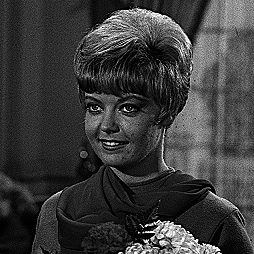

In [10]:
filter = convolution2d(img_grey, kernel_sharpen)
cv2_imshow(filter)

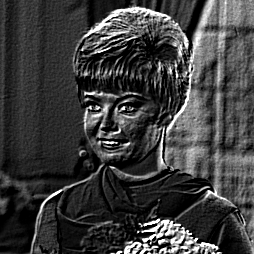

In [11]:
filter = convolution2d(img_grey, kernel_emboss)
cv2_imshow(filter)

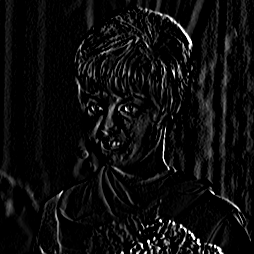

In [12]:
filter = convolution2d(img_grey, kernel_sobel)
cv2_imshow(filter)

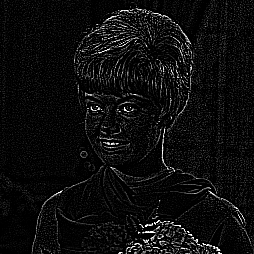

In [13]:
filter = convolution2d(img_grey, kernel_canny)
cv2_imshow(filter)

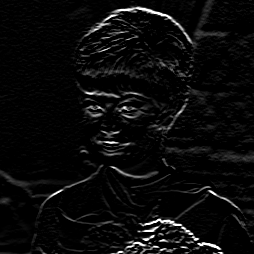

In [14]:
filter = convolution2d(img_grey, kernel_prewitt)
cv2_imshow(filter)

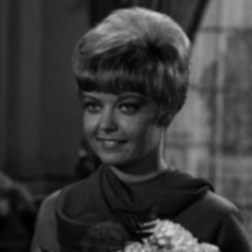

In [15]:
filter = convolution2d(img_grey, kernel_gaussian)
cv2_imshow(filter)

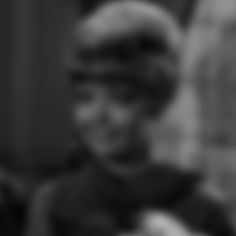

In [17]:
filter = convolution2d(img_grey, kernel_gaussian_2d)
cv2_imshow(filter)